# Neural Network - Example - my learning notes 

created based on youtube video - Neural Networks Demystified  by Welch Labs

In [51]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

Let’s say you want to predict some output value y, given some input value X. For example, maybe you want to predict your score on a test based on how many hours you sleep and how many hours you study the night before. To use a machine learning approach, we first need some data. Let’s say for the last three tests, you recorded your number of hours of studying, your number of hours sleeping, and your score on the test. We'll use the programming language python to store our data in 2-dimensional numpy arrays

In [3]:
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [5]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

In [6]:
X = X/np.amax(X, axis=0)

In [7]:
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100
#normalization

In [8]:
X,y

(array([[ 0.3,  1. ],
        [ 0.5,  0.2],
        [ 1. ,  0.4]]), array([[ 0.75],
        [ 0.82],
        [ 0.93]]))

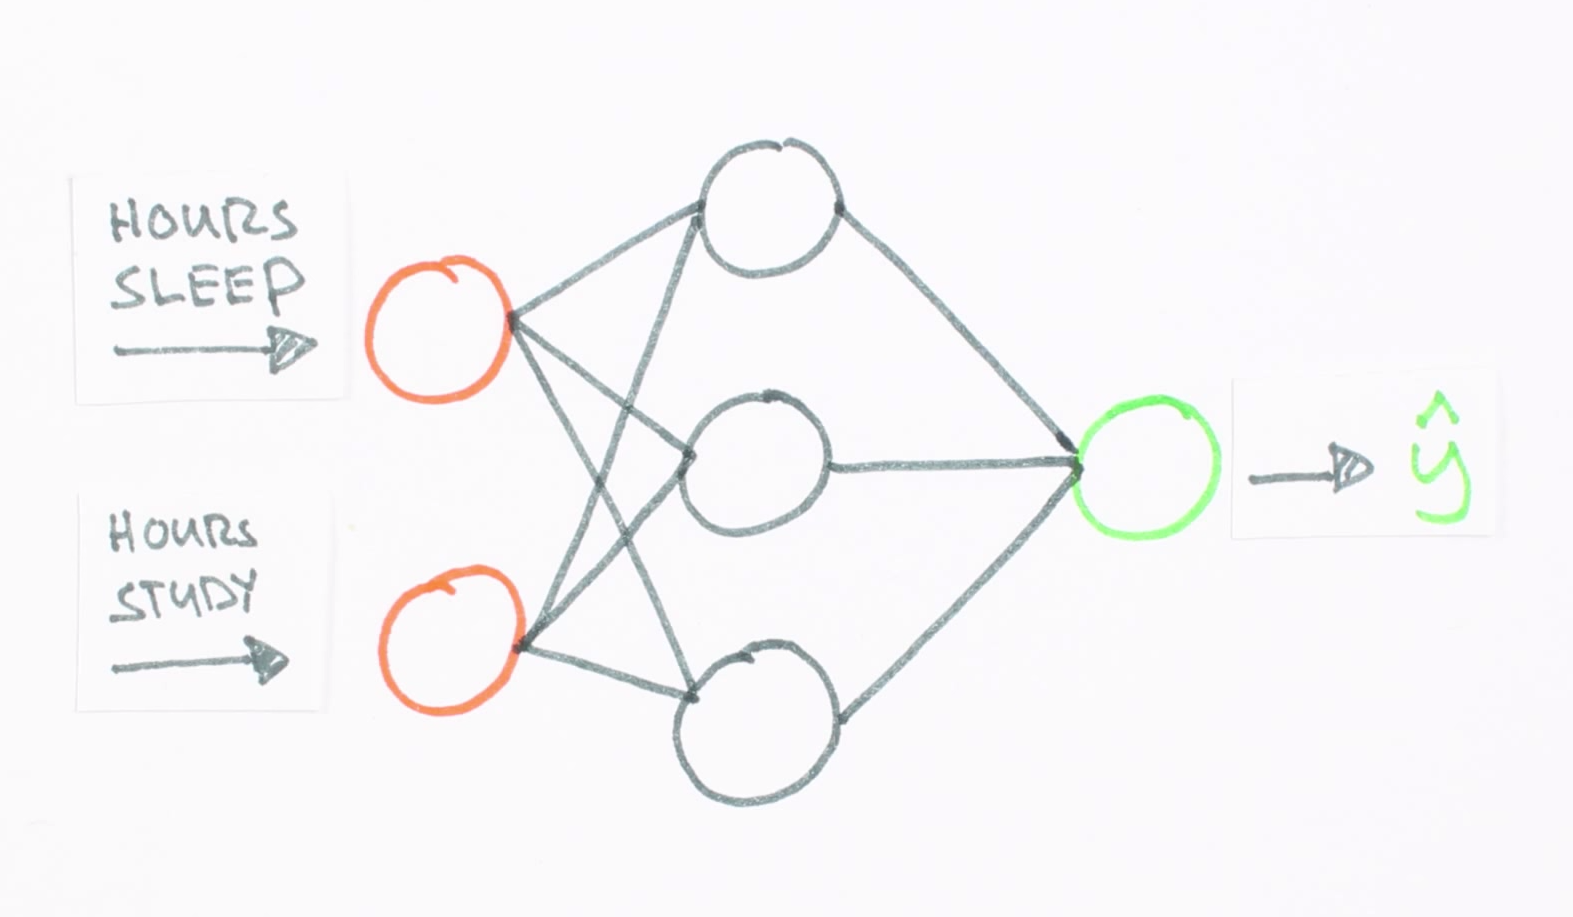

In [75]:
from IPython.display import Image
img1 = Image(filename='ANN_image1.png')
img2 = Image(filename='ANN_image2.png')
img3 = Image(filename='ANN_image3.png')
img4 = Image(filename='ANN_image4.png')
img1

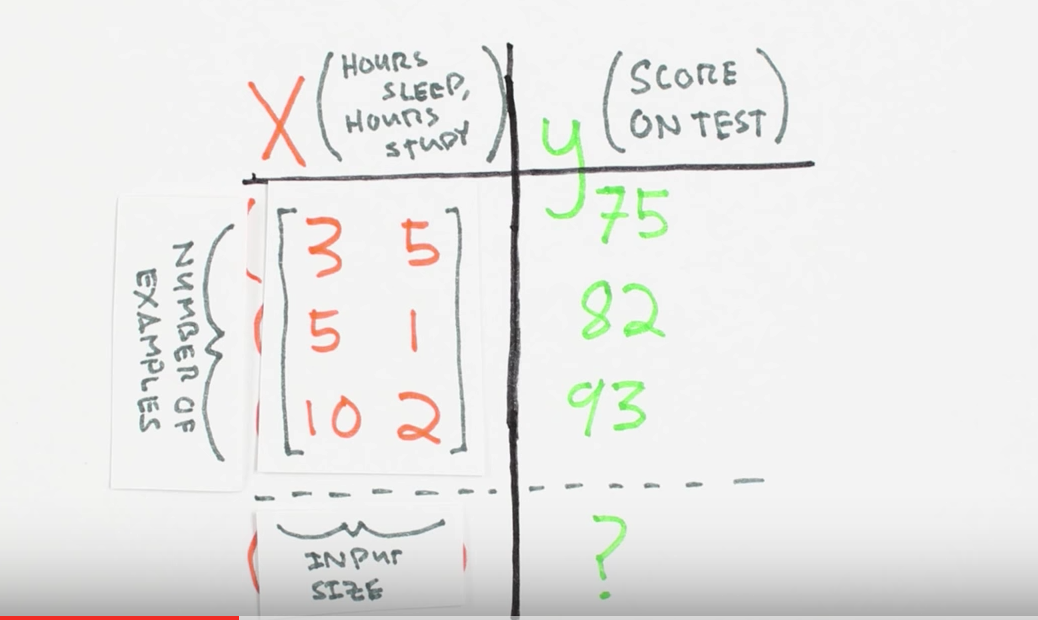

In [72]:
img3

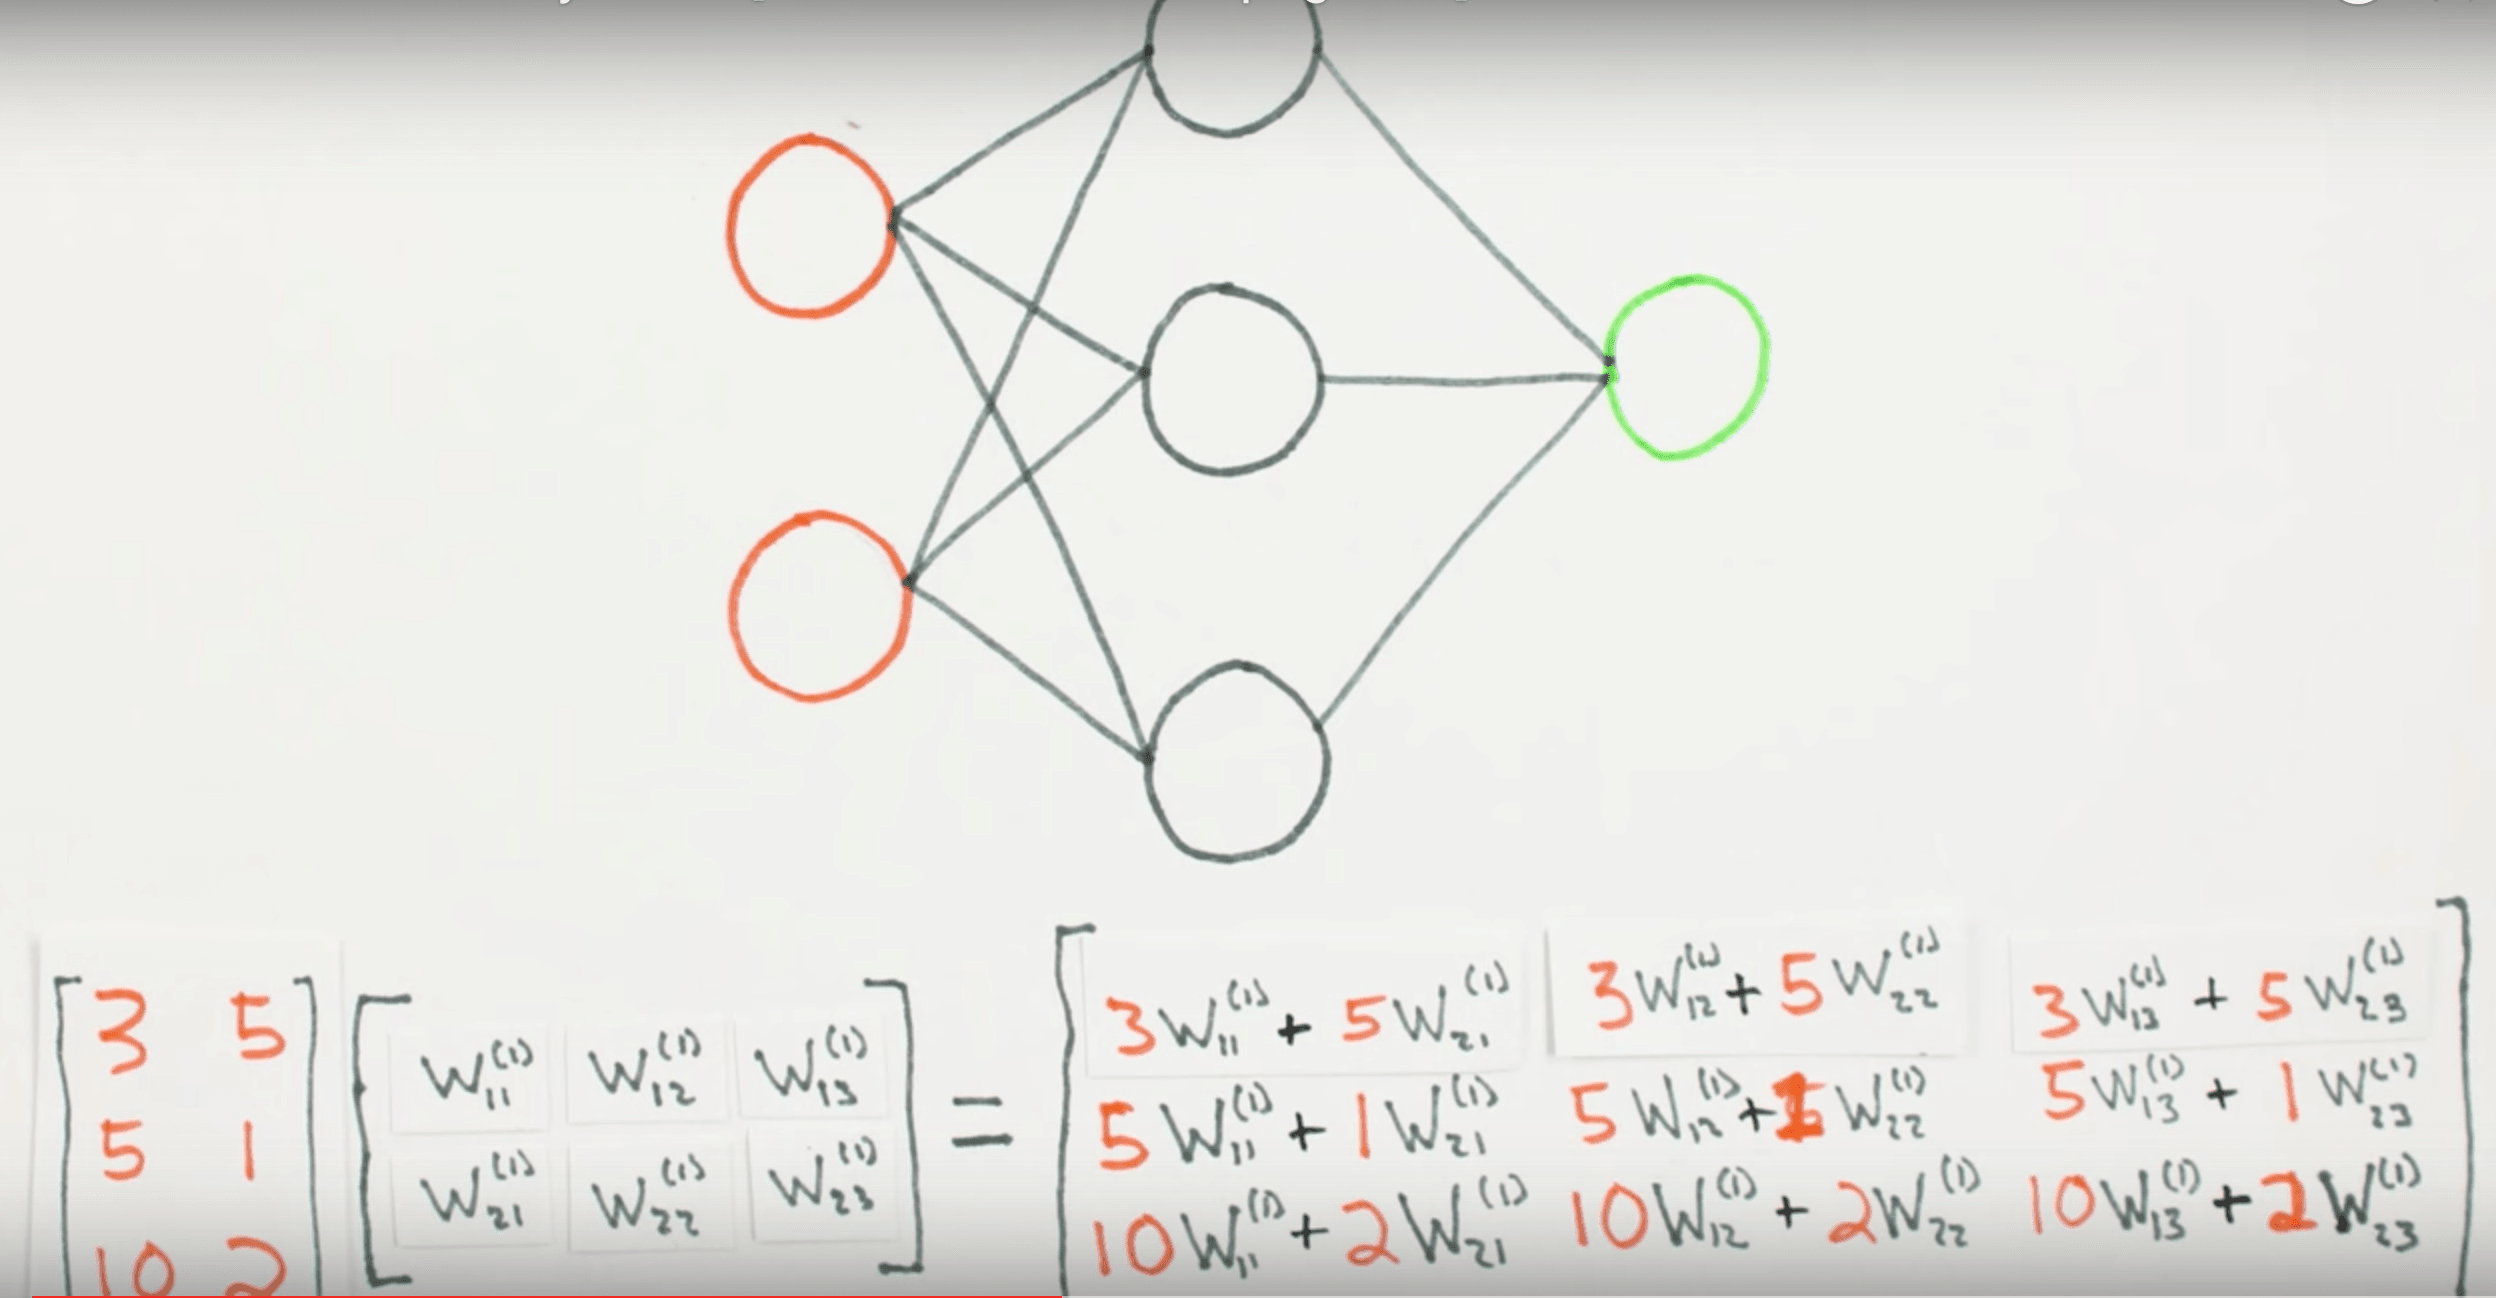

In [76]:
img4

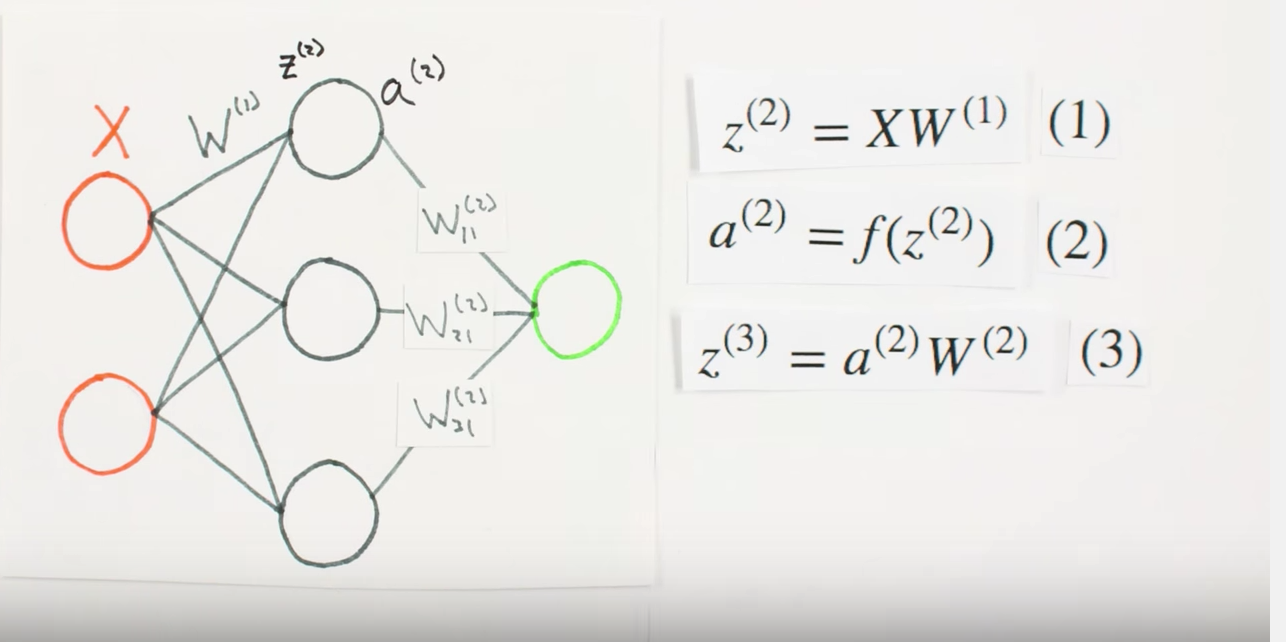

In [77]:
img2

# Part1 - Forward Propagation

Variables
Code Symbol	Math Symbol	Definition	Dimensions - All are defined in the form of matrices 


X	$$X$$	Input Data, each row in an example	(numExamples, inputLayerSize)
y	$$y$$	target data	(numExamples, outputLayerSize)
W1	$$W^{(1)}$$	Layer 1 weights	(inputLayerSize, hiddenLayerSize) 
W2	$$W^{(2)}$$	Layer 2 weights	(hiddenLayerSize, outputLayerSize) - second layer weights 
z2	$$z^{(2)}$$	Layer 2 activation	(numExamples, hiddenLayerSize)
a2	$$a^{(2)}$$	Layer 2 activity	(numExamples, hiddenLayerSize)
z3	$$z^{(3)}$$	Layer 3 activation	(numExamples, outputLayerSize)


JUST TO AVOID CONFUTION in this example -  W1-  first layer weights in matrices [2X3 ] in the form w11,w12,w13,w21,w22,w23
W2 - first layer weights in matrices in the form [3,1]  w11,w12,w13

Last time, we setup our neural network on paper. This time, we’ll implement it in the programming language python. We’ll build our network as a python class and our init method will take care of instantiating important constants and variables. We’ll make these values accessible to the whole class by placing a self dot in front of each variable name.
Our network has 2 inputs, 3 hidden units, and 1 output. These are examples of hyperparameters. Hyperparameters are constants that establish the structure and behavior of a neural network, but are not updated as we train the network. Our learning algorithm is not capable of, for example, deciding that it needs another hidden unit, this is something that WE must decide on before training. What a neural network does learn are parameters, specifically the weights on the synapses.
We’ll take care of moving data through our network in a method called forward. Rather than pass inputs through the network one at a time, we’re going to use matrices to pass through multiple inputs at once. Doing this allows for big computational speedups, especially when using tools like MATLAB or Numpy. Our input data matrix, X, is of dimension 3 by 2, because we have 3, 2-dimensional examples. Our corresponding output data, y, is of dimension 3 by 1.




In [17]:
print (X.shape, y.shape)

(3, 2) (3, 1)


In [18]:
def sigmoid(z):
    #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z))

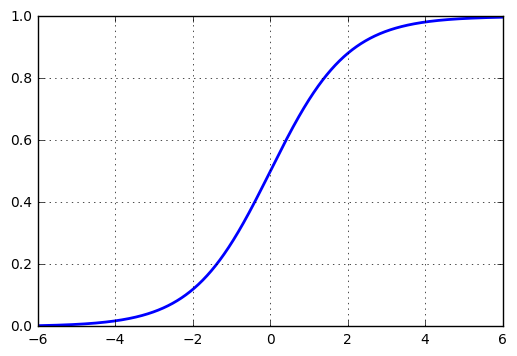

In [35]:
testInput = np.arange(-6,6,0.01)
plt.plot(testInput, sigmoid(testInput), linewidth= 2)
plt.grid(1)
plt.show()

In [36]:

sigmoid(1)

0.7310585786300049

In [37]:
sigmoid(np.random.randn(3,3))

array([[ 0.67278515,  0.26127397,  0.81271904],
       [ 0.0682714 ,  0.33589739,  0.41992662],
       [ 0.66565947,  0.35316428,  0.34557748]])

We now have our second formula for forward propagation, using f to denote our activation function, we can write that a two, our second layer activity, is equal to f of z two. a two will be a matrix of the same size as z two, 3 by 3.
$$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$
To finish forward propagation we need to propagate a two all the way to the output, yhat. We've already done the heavy lifting in the previous layer, so all we have to do now is multiply a two by our senond layer weights W2 and apply one more activation funcion. W2 will be of size 3x1, one weight for each synapse. Multiplying a2, a 3 by 3, by W2, a 3 by 1 results in a 3 by 1 matrix z three, the activity or our third layer. z3 has three activity values, one for each example. Last but not least, we'll apply our activation function to z three yielding our official estimate of your test score, yHat.
$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$$$
\hat{y} = f(z^{(3)}) \tag{4}\\
$$
We need to implement our forward propagation formulas in python. First we'll initialize our weight matrices in our init method. For starting values, we'll use random numbers.
We'll implement forward propagation in our forward method, using numpy's built in dot method for matrix multiplication and our own sigmoid method.

The number of hidden nodes you should have is based on a complex relationship between
Number of input and output nodes
Amount of training data available
Complexity of the function that is trying to be learned
The training algorithm
Source: http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-10.html
 
To minimize the error and have a trained network that generalizes well, you need to pick an optimal number of hidden layers, as well as nodes in each hidden layer. 
1. Too few nodes will lead to high error for your system as the predictive factors might be too complex for a small number of nodes to capture
2. Too many nodes will overfit to your training data and not generalize well

 I could find some general advice on this page 
1. The number of hidden nodes in each layer should be somewhere between the size of the input and output layer, potentially the mean.
3. The number of hidden nodes shouldn't need to exceed twice the number of input nodes, as you are probably grossly overfitting at this point.
One paper details how a researcher used some dimensionality reduction on the training images and found that 17 was an optimal number of hidden nodes. While it might be specific to his problem, you can check it out here for ideas:(Effects of the number of hidden nodes used in a structured-based neural network on the reliability of image classification)

##THere is no easy solution do trial and error mentod to find the right solution

In [43]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

In [39]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [40]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [44]:
NN = Neural_Network()

In [45]:
yHat = NN.forward(X)


In [46]:
yHat

array([[ 0.22953337],
       [ 0.28958174],
       [ 0.38855188]])

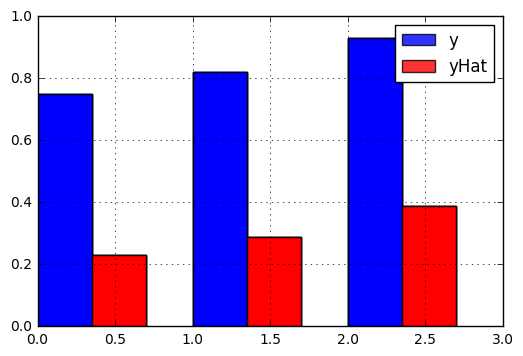

In [54]:
#Compare estimate, yHat, to actually score
plt.bar([0,1,2], y, width = 0.35, alpha=0.8)
plt.bar([0.35,1.35,2.35],yHat, width = 0.35, color='r', alpha=0.8)
plt.grid(1)
plt.legend(['y', 'yHat'])
plt.show()


Right now our predictions are pretty inaccurate. To improve our model, we first need to quantify exactly how wrong our predictions are. We'll do this with a cost function. A cost function allows us to express exactly how wrong or "costly" our models is, given our examples.
One way to compute an overall cost is to take each error value, square it, and add these values together. Multiplying by one half will make things simpler down the road. Now that we have a cost, or job is to minimize it. When someone says they’re training a network, what they really mean is that they're minimizing a cost function.
$$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{5}
$$
OUR cost is a function of two things, our examples, and the weights on our synapses. We don't have much control of our data, so we'll minimize our cost by changing the weights.
Conceptually, this is pretty simple concept. We have a collection of 9 individual weights, and we're saying that there is some combination of w's that will make our cost, J, as small as possible. When I first saw this problem in machine learning, I thought, I'll just try ALL THE WEIGHTS UNTIL I FIND THE BEST ONE! After all I have a computer!
Enter the CURSE OF DIMENSIONALITY. Here's the problem. Let's pretend for a second that we only have 1 weight, instead of 9. To find the ideal value of our weight that will minimize our cost, we need to try a bunch of values for W, let's say we test 1000 values. That doesn't seem so bad, after all, my computer is pretty fast. try it below

In [56]:
# testing one dimenstionity of a weight. checking for the effecient 
import time

weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros(1000)

startTime = time.clock()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5*sum((y-yHat)**2)
    
endTime = time.clock()
timeElapsed = endTime-startTime
timeElapsed 

0.04919000000000029

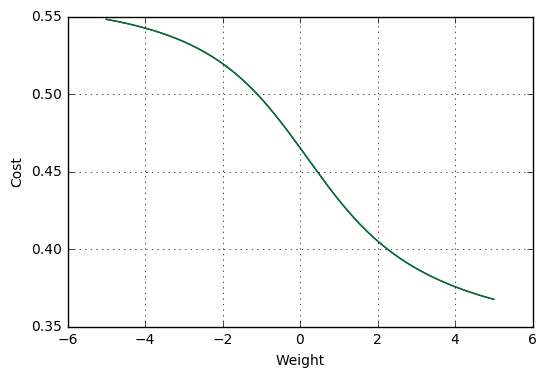

In [58]:
plt.plot(weightsToTry, costs)
plt.grid(1)
plt.ylabel('Cost')
plt.xlabel('Weight')
plt.show()

Before we optimize through, let's consider the full complexity of the problem. Remember the 0.04 seconds required is only for one weight, and we have 9 total! Let's next consider 2 weights for a moment. To maintain the same precision we now need to check 1000 times 1000, or one million values. Let try for two dimention

In [63]:
weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros((1000, 1000))

startTime = time.clock()
for i in range(1000):
    for j in range(1000):
        NN.W1[0,0] = weightsToTry[i]
        NN.W1[0,1] = weightsToTry[j]
        yHat = NN.forward(X)
        costs[i, j] = 0.5*sum((y-yHat)**2)
    
endTime = time.clock()
timeElapsed = endTime-startTime
timeElapsed

24.181359999999998


After our 1 million evaluations we’ve found our solution, but it took an agonizing 40 seconds! The real curse of dimensionality kicks in as we continue to add dimensions. Searching through three weights would take a billion evaluations, or 11 hours! Searching through all 9 weights we need for our simple network would take 1,268,391,679,350,583.5 years. (Over a quardrillion years). So for that reason, the "just try everything" or brute force optimization method is clearly not going to work.


Let's return to the 1-dimensional case and see if we can be more clever. Let's evaluate our cost function for a specific value of w. If w is 1.1 for example, we can run our cost function, and see that J is 2.8. Now we haven't learned much yet, but let's try to add a little information to what we already know. What if we could figure out which way was downhill? If we could, we would know whether to make W smaller or larger do decrease the cost. We could test the cost function immediately to the left and right of our test point and see which is smaller. This is called numerical estimation, and is sometimes a good approach, but for us, there's a faster way. Let's look at our equations so far.
$$
z^{(2)} = XW^{(1)} \tag{1}\\
$$$$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$$$
\hat{y} = f(z^{(3)}) \tag{4}\\
$$$$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{5}\\
$$
We have 5 equations, but we can really think of them as one big equation.
And since we have one big equation that uniquely determines our cost, J, from X, y, W1, and W2, we can use our good friend calculus to find what we're looking for. We want to know "which way is downhill", that is, what is the rate of change of J with respect to W, also known as the derivative. And in this case, since we’re just considering one weight at a time, the partial derivative.
We can derive an expression for dJdW, that will give us the rate of change of J with respect to W, for any value of W! If dJdW is positive, then the cost function is going uphill. If dJdW is negative the cost function is going downhill.
Now we can really speed things up. Since we know in which direction the cost decreases, we can save all that time we would have spent searching in the wrong direction. We can save even more computational time by iteratively taking steps downhill and stopping when the cost stops getting smaller.
This method is known as gradient descent, and although it may not seem so impressive in one dimension, it is capable of incredible speedups in higher dimensions. In fact, in our final video, we’ll show that what would have taken 10^27 function evaluations with our brute force method will take less than 100 evaluations with gradient descent. Gradient descent allows us to find needles in very very very large haystacks.
Now before we celebrate too much here, there is a restriction. What if our cost function doesn't always go in the same direction? What if it goes up, then back down? The mathematical name for this is non-convex, and it could really throw off our gradient descent algorithm by getting it stuck in a local minima instead of our ideal global minima. One of the reasons we chose our cost function to be the sum of squared errors was to exploit the convex nature of quadratic equations.
We know that the graph of y equals x squared is a nice convex parabola and it turns out that higher dimensional versions are too!
Another piece of the puzzle here is that depending on how we use our data, it might not matter if or cost function is convex or not. If we use our examples one at a time instead of all at once, sometimes it won't matter if our cost function is convex, we will still find a good solution. This is called stochastic gradient descent. So maybe we shouldn't be afraid of non-convex cost functions, as Neural Network wizard Yann Lecun says in his excellent talk "Who is afraid on non-convex loss funtions?"
Link to Yann's Talk: http://videolectures.net/eml07_lecun_wia/
The details of gradient descent are a deep topic for another day, for now we're going to do our gradient descent "batch" style, where we use all our example at once, and the way we've setup our cost function will keep things nice and convex. Next time we'll compute and code up our gradients!

# Part 2: Backpropagation

Variables
Code Symbol	Math Symbol	Definition	Dimensions
X	$$X$$	Input Data, each row in an example	(numExamples, inputLayerSize)
y	$$y$$	target data	(numExamples, outputLayerSize)
W1	$$W^{(1)}$$	Layer 1 weights	(inputLayerSize, hiddenLayerSize)
W2	$$W^{(2)}$$	Layer 2 weights	(hiddenLayerSize, outputLayerSize)
z2	$$z^{(2)}$$	Layer 2 activation	(numExamples, hiddenLayerSize)
a2	$$a^{(2)}$$	Layer 2 activity	(numExamples, hiddenLayerSize)
z3	$$z^{(3)}$$	Layer 3 activation	(numExamples, outputLayerSize)
J	$$J$$	Cost	(1, outputLayerSize)
dJdz3	$$\frac{\partial J}{\partial z^{(3)} } = \delta^{(3)}$$	Partial derivative of cost with respect to $z^{(3)}$	(numExamples,outputLayerSize)
dJdW2	$$\frac{\partial J}{\partial W^{(2)}}$$	Partial derivative of cost with respect to $W^{(2)}$	(hiddenLayerSize, outputLayerSize)
dz3dz2	$$\frac{\partial z^{(3)}}{\partial z^{(2)}}$$	Partial derivative of $z^{(3)}$ with respect to $z^{(2)}$	(numExamples, hiddenLayerSize)
dJdW1	$$\frac{\partial J}{\partial W^{(1)}}$$	Partial derivative of cost with respect to $W^{(1)}$	(inputLayerSize, hiddenLayerSize)
delta2	$$\delta^{(2)}$$	Backpropagating Error 2	(numExamples,hiddenLayerSize)
delta3	$$\delta^{(3)}$$	Backpropagating Error 1	(numExamples,outputLayerSize)
Last time, we decided to use gradient descent to train our Neural Network, so it could make better predictions of your score on a test based on how many hours you slept, and how many hours you studied the night before. To perform gradient descent, we need an equation and some code for our gradient, dJ/dW.
Our weights, W, are spread across two matrices, W1 and W2. We’ll separate our dJ/dW computation in the same way, by computing dJdW1 and dJdW2 independently. We should have just as many gradient values as weight values, so when we’re done, our matrices dJdW1 and dJdW2 will be the same size as W1 and W2.
$$
\frac{\partial J}{\partial W^{(2)}} = \frac{\partial \sum \frac{1}{2}(y-\hat{y})^2}{\partial W^{(2)}}
$$
Let’s work on dJdW2 first. The sum in our cost function adds the error from each example to create our overall cost. We’ll take advantage of the sum rule in differentiation, which says that the derivative of the sums equals the sum of the derivatives. We can move our sigma outside and just worry about the derivative of the inside expression first.
$$
\frac{\partial J}{\partial W^{(2)}} = \sum \frac{\partial \frac{1}{2}(y-\hat{y})^2}{\partial W^{(2)}}
$$
To keep things simple, we’ll temporarily forget about our summation. Once we’ve computed dJdW for a single example, we’ll add all our individual derivative terms together.
We can now evaluate our derivative. The power rule tells us to bring down our exponent, 2, and multiply. To finish our derivative, we’ll need to apply the chain rule.
The chain rule tells us how to take the derivative of a function inside of a function, and generally says we take the derivative of the outside function and then multiply it by the derivative of the inside function.
One way to express the chain rule is as the product of derivatives, this will come in very handy as we progress through backpropagation. In fact, a better name for backpropagation might be: don’t stop doing the chain rule. ever.
We’ve taken the derivative of the outside of our cost function - now we need to multiply it by the derivative of the inside.
Y is just our test scores, which won’t change, so the derivative of y, a constant, with respect to W two is 0! yHat, on the other hand, does change with respect to W two, so we’ll apply the chain rule and multiply our results by minus dYhat/dW2.
$$
\frac{\partial J}{\partial W^{(2)}} = -(y-\hat{y}) \frac{\partial \hat{y}}{\partial W^{(2)}}
$$
We now need to think about the derivative of yHat with respect to W2. Equation 4 tells us that yHat is our activation function of z3, so we it will be helpful to apply the chain rule again to break dyHat/dW2 into dyHat/dz3 times dz3/dW2.
$$
\frac{\partial J}{\partial W^{(2)}} = 
-(y-\hat{y})
\frac{\partial \hat{y}}{\partial z^{(3)}}  
\frac{\partial z^{(3)}}{\partial W^{(2)}}
$$
To find the rate of change of yHat with respect to z3, we need to differentiate our sigmoid activation function with respect to z.
$$
f(z) = \frac{1}{1+e^{-z}}
$$
$$
f^\prime(z) = \frac{e^{-z}}{(1+e^{-z})^2}
$$
Now is a good time to add a new python method for the derivative of our sigmoid function, sigmoid Prime. Our derivative should be the largest where our sigmoid function is the steepest, at the value z equals zero.

In [78]:
def sigmoidPrime(z):
    #Derivative of sigmoid function
    return np.exp(-z)/((1+np.exp(-z))**2)

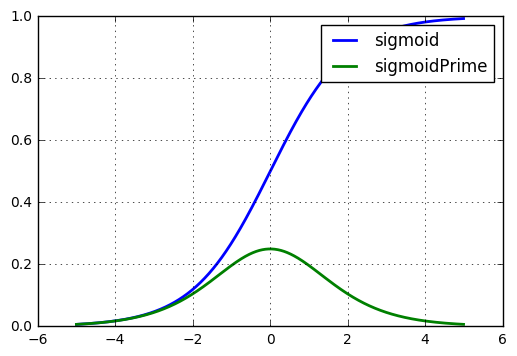

In [79]:
testValues = np.arange(-5,5,0.01)
plt.plot(testValues, sigmoid(testValues), linewidth=2)
plt.plot(testValues, sigmoidPrime(testValues), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])
plt.show()

We can now replace dyHat/dz3 with f prime of z 3.
$$
\frac{\partial J}{\partial W^{(2)}}= 
-(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(2)}}
$$
Our final piece of the puzzle is dz3dW2, this term represents the change of z, our third layer activity, with respect to the weights in the second layer.
Z three is the matrix product of our activities, a two, and our weights, w two. The activities from layer two are multiplied by their correspond weights and added together to yield z3. If we focus on a single synapse for a moment, we see a simple linear relationship between W and z, where a is the slope. So for each synapse, dz/dW(2) is just the activation, a on that synapse!
$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$
Another way to think about what the calculus is doing here is that it is “backpropagating” the error to each weight, by multiplying by the activity on each synapses, the weights that contribute more to the error will have larger activations, and yield larger dJ/dW2 values, and those weights will be changed more when we perform gradient descent.
We need to be careful with our dimensionality here, and if we’re clever, we can take care of that summation we got rid of earlier.
The first part of our equation, y minus yHat is of the same dimension as our output data, 3 by 1.
F prime of z three is of the same size, 3 by 1, and our first operation is scalar multiplication. Our resulting 3 by 1 matrix is referred to as the backpropagating error, delta 3.
We determined that dz3/dW2 is equal to the activity of each synapse. Each value in delta 3 needs to be multiplied by each activity. We can achieve this by transposing a2 and matrix multiplying by delta3.
$$
\frac{\partial J}{\partial W^{(2)}} = 
(a^{(2)})^T\delta^{(3)}\tag{6}
$$
$$
\delta^{(3)} = -(y-\hat{y}) f^\prime(z^{(3)}) 
$$
What’s cool here is that the matrix multiplication also takes care of our earlier omission – it adds up the dJ/dW terms across all our examples.
Another way to think about what’s happening here is that is that each example our algorithm sees has a certain cost and a certain gradient. The gradient with respect to each example pulls our gradient descent algorithm in a certain direction. It's like every example gets a vote on which way is downhill, and when we perform batch gradient descent we just add together everyone’s vote, call it downhill, and move in that direction.
We’ll code up our gradients in python in a new method, cost function prime. Numpy’s multiply method performs element-wise multiplication, and the dot method performs matrix multiplication.

We have one final term to compute: dJ/dW1. The derivation begins the same way, computing the derivative through our final layer: first dJ/dyHat, then dyHat/dz3, and we called these two taken together form our backpropagating error, delta3. We now take the derivative “across” our synapses, this is a little different from out job last time, computing the derivative with respect to the weights on our synapses.
$$
\frac{\partial J}{\partial W^{(1)}} = (y-\hat{y})
\frac{\partial \hat{y}}{\partial W^{(1)}}
$$$$
\frac{\partial J}{\partial W^{(1)}} = (y-\hat{y})
\frac{\partial \hat{y}}{\partial z^{(3)}}
\frac{\partial z^{(3)}}{\partial W^{(1)}}
$$$$
\frac{\partial J}{\partial W^{(1)}} = -(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(1)}}
$$$$
\frac{\partial z^{(3)}}{\partial W^{(1)}} = \frac{\partial z^{(3)}}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial W^{(1)}}
$$
There’s still a nice linear relationship along each synapse, but now we’re interested in the rate of change of z(3) with respect to a(2). Now the slope is just equal to the weight value for that synapse. We can achieve this mathematically by multiplying by W(2) transpose.
$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
\frac{\partial a^{(2)}}{\partial W^{(1)}}
$$
$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
\frac{\partial a^{(2)}}{\partial z^{(2)}}
\frac{\partial z^{(2)}}{\partial W^{(1)}}
$$
Our next term to work on is da(2)/dz(2) – this step is just like the derivative across our layer 3 neurons, so we can just multiply by f prime(z2).
$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})
\frac{\partial z^{(2)}}{\partial W^{(1)}}
$$
Our final computation here is dz2/dW1. This is very similar to our dz3/dW2 computation, there is a simple linear relationship on the synapses between z2 and w1, in this case though, the slope is the input value, X. We can use the same technique as last time by multiplying by X transpose, effectively applying the derivative and adding our dJ/dW1’s together across all our examples.
$$
\frac{\partial J}{\partial W^{(1)}} = 
X^{T}
\delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})
$$
Or:
$$
\frac{\partial J}{\partial W^{(1)}} = 
X^{T}\delta^{(2)} \tag{7}
$$
Where:
$$
\delta^{(2)} = \delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})
$$
All that’s left is to code this equation up in python. What’s cool here is that if we want to make a deeper neural network, we could just stack a bunch of these operations together.

In [81]:
# Whole Class with additions:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2

In [82]:
NN = Neural_Network()

In [84]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [93]:
cost1 = NN.costFunction(X,y)

In [86]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [87]:
dJdW1

array([[ 0.00873356,  0.06268018, -0.02066115],
       [ 0.00763938,  0.04842029, -0.0168798 ]])

In [88]:
dJdW2

array([[-0.11262882],
       [-0.11418244],
       [-0.10623191]])

If we move this way by adding a scalar times our derivative to our weights, our cost will increase, and if we do the opposite, subtract our gradient from our weights, we will move downhill and reduce our cost. This simple step downhill is the core of gradient descent and a key part of how even very sophisticated learning algorithms are trained

In [89]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)

In [95]:
print (cost1, cost2)

[ 0.43844865] [ 0.43844865]


In [96]:

dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)

In [98]:
print (cost2, cost3)

[ 0.43844865] [ 0.27585113]


Next time we’ll perform numerical gradient checking check to make sure our math is correct.

Last time, we did a bunch of calculus to find the rate of change of our cost, J, with respect to our parameters, W. Although each calculus step was pretty straight forward, it’s still easy to make mistakes. What’s worse, is that our network doesn’t have a good way to tell us that it’s broken – code with incorrectly implemented gradients may appear to be functioning just fine.
This is the most nefarious kind of error when building complex systems. Big, in-your-face errors suck initially, but it’s clear that you must fix this error for your work to succeed. More subtle errors can be more troublesome because they hide in your code and steal hours of your time, slowly degrading performance, while you wonder what the problem is.
A good solution here is to test the gradient computation part of our code, just as developer would unit test new portions of their code. We’ll combine a simple understanding of the derivative with some mild cleverness to perform numerical gradient checking. If our code passes this test, we can be quite confident that we have computed and coded up our gradients correctly.
To get started, let’s quickly review derivatives. Derivates tell us the slope, or how steep a function is. Once you’re familiar with calculus, it’s easy to take for granted the inner workings of the derivative - we just accept that the derivative of x^2 is 2x by the power rule. However, depending on how mean your calculus teacher was, you may have spent months not being taught the power rule, and instead required to compute derivatives using the definition. Taking derivatives this way is a bit tedious, but still important - it provides us a deeper understanding of what a derivative is, and it’s going to help us solve our current problem.
The definition of the derivative is really a glorified slope formula. The numerator gives us the change in y values, while the denominator is convenient way to express the change in x values. By including the limit, we are applying the slope formula across an infinitely small region – it’s like zooming in on our function, until it becomes linear.
The definition tells us to zoom in until our x distance is infinitely small, but computers can’t really handle infinitely small numbers, especially when they’re in the bottom parts of fractions - if we try to plug in something too small, we will quickly lose precision. The good news here is that if we plug in something reasonable small, we can still get surprisingly good numerical estimates of the derivative.
We’ll modify our approach slightly by picking a point in the middle of the interval we would like to test, and call the distance we move in each direction epsilon.
Let’s test our method with a simple function, x squared. We’ll choose a reasonable small value for epsilon, and compute the slope of x^2 at a given point by finding the function value just above and just below our test point. We can then compare our result to our symbolic derivative 2x, at the test point. If the numbers match, we’re in business!

In [105]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

We can use the same approach to numerically evaluate the gradient of our neural network. It’s a little more complicated this time, since we have 9 gradient values, and we’re interested in the gradient of our cost function. We’ll make things simpler by testing one gradient at a time. We’ll “perturb” each weight - adding epsilon to the current value and computing the cost function, subtracting epsilon from the current value and computing the cost function, and then computing the slope between these two values.

In [106]:
def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad 


We’ll repeat this process across all our weights, and when we’re done we’ll have a numerical gradient vector, with the same number of values as we have weights. It’s this vector we would like to compare to our official gradient calculation. We see that our vectors appear very similar, which is a good sign, but we need to quantify just how similar they are.

In [107]:

NN = Neural_Network()

In [108]:
numgrad = computeNumericalGradient(NN, X, y)
numgrad

array([-0.00699359,  0.06276341,  0.06119038, -0.00474896,  0.05073975,
        0.04963189, -0.14900312, -0.07612735, -0.18281729])

In [109]:
grad = NN.computeGradients(X,y)
grad

array([-0.00699359,  0.06276341,  0.06119038, -0.00474896,  0.05073975,
        0.04963189, -0.14900312, -0.07612735, -0.1828173 ])


A nice way to do this is to divide the norm of the difference by the norm of the sum of the vectors we would like to compare. Typical results should be on the order of 10^-8 or less if you’ve computed your gradient correctly.

In [113]:
from numpy import linalg as LA
LA.norm(grad-numgrad)/LA.norm(grad+numgrad)

1.4962111148887984e-10

#  Part 3 Training

So far we’ve built a neural network in python, computed a cost function to let us know how well our network is performing, computed the gradient of our cost function so we can train our network, and last time we numerically validated our gradient computations. After all that work, it’s finally time to train our neural network.
So far we decided to train our network using gradient descent. While gradient descent is conceptually pretty straight forward, its implementation can actually be quite complex- especially as we increase the size and number of layers in our neural network. If we just march downhill with consistent step sizes, we may get stuck in a local minimum or flat spot, we may move too slowly and never reach our minimum, or we may move to quickly and bounce out of our minimum. And remember, all this must happen in high-dimensional space, making things significantly more complex. Gradient descent is a wonderfully clever method, but provides no guarantees that we will converge to a good solution, that we will converge to a solution in a certain amount of time, or that we will converge to a solution at all.
The good and bad news here is that this problem is not unique to Neural Networks - there’s an entire field dedicated to finding the best combination of inputs to minimize the output of an objective function: the field of Mathematical Optimization. The bad news is that optimization can be a bit overwhelming; there are many different techniques we could apply to our problem.
Part of what makes the optimization challenging is the broad range of approaches covered - from very rigorous, theoretical methods to hands-on, more heuristics-driven methods. Yann Lecun’s 1998 publication Efficient BackProp presents an excellent review of various optimization techniques as applied to neural networks.
Here, we’re going to use a more sophisticated variant on gradient descent, the popular Broyden-Fletcher-Goldfarb-Shanno numerical optimization algorithm. The BFGS algorithm overcomes some of the limitations of plain gradient descent by estimating the second derivative, or curvature, of the cost function surface, and using this information to make more informed movements downhill. BFGS will allow us to find solutions more often and more quickly.
We’ll use the BFGS implementation built into the scipy optimize package, specifically within the minimize function. To use BFGS, the minimize function requires us to pass in an objective function that accepts a vector of parameters, input data, and output data, and returns both the cost and gradients. Our neural network implementation doesn’t quite follow these semantics, so we’ll use a wrapper function to give it this behavior. We’ll also pass in initial parameters, set the jacobian parameter to true since we’re computing the gradient within our neural network class, set the method to BFGS, pass in our input and output data, and some options. Finally, we’ll implement a callback function that allows us to track the cost function value as we train the network. Once the network is trained, we’ll replace the original, random parameters, with the trained parameters.

In [100]:

from scipy import optimize

In [101]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

If we plot the cost against the number of iterations through training, we should see a nice, monotonically decreasing function. Further, we see that the number of function evaluations required to find the solution is less than 100, and far less than the 10^27 function evaluation that would have been required to find a solution by brute force, as shown in part 3. Finally, we can evaluate our gradient at our solution and see very small values – which make sense, as our minimum should be quite flat.

In [114]:
NN = Neural_Network()
T = trainer(NN)
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 71
         Function evaluations: 89
         Gradient evaluations: 89


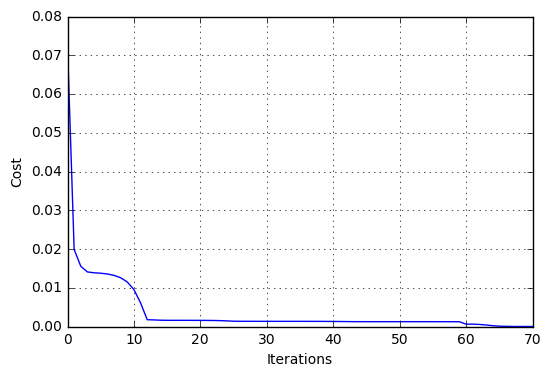

In [115]:
plt.plot(T.J)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [116]:

NN.costFunctionPrime(X,y)

(array([[ -2.27873808e-07,   5.12960961e-06,  -1.74769229e-08],
        [  2.95135429e-08,  -2.48464012e-06,  -3.03340009e-09]]),
 array([[  1.52378551e-06],
        [  5.50497068e-06],
        [  6.99752730e-06]]))

In [117]:
NN.forward(X)

array([[ 0.74998119],
       [ 0.82007208],
       [ 0.92999844]])

In [118]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [153]:
import numpy as np
from numpy import linspace,meshgrid
#Test network for various combinations of sleep/study:
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [123]:
allOutputs = NN.forward(allInputs)

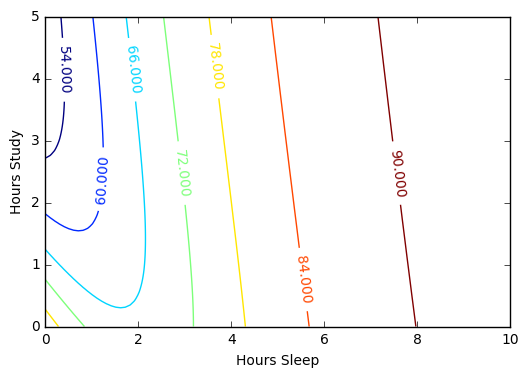

In [126]:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('Hours Sleep')
plt.ylabel('Hours Study')
plt.show()

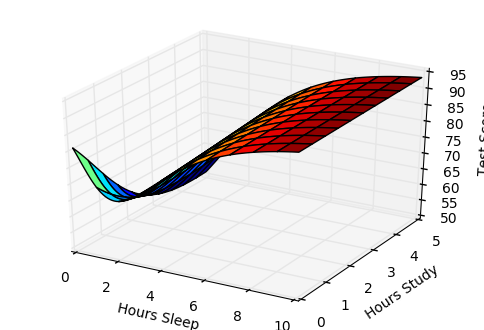

In [157]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')
fig

Our results look pretty reasonable, and we see that for our model, sleep actually has a bigger impact on your grade than studying – something I wish I had realized when I was in school. So we’re done, right? Nope.
We’ve made possibly the most dangerous and tempting error in machine learning – overfitting. Although our network is performing incredibly well (maybe too well) on our training data – that doesn’t mean that our model is a good fit for the real world, and that’s what we’ll work on next time.

# Part 4: Overfitting, Testing, and Regularization

Last time, we trained our Neural Network, and it made suspiciously good predictions of your test score based on how many hours you slept, and how many hours you studied the night before. Before we celebrate and begin changing our sleep and study habits, we need some way to ensure that our model reflects the real world.
To do this, let’s first spend some time thinking about data. Like a lot of data, our input and output values come from real world observations. The assumption here is that there is some underlying process, and our observations give us insight into the process - BUT our observations are not the same thing as the process, they are just a sample.
Our observation says that when we sleep for 3 hours and study for 5 hours, the grade we earned was a 75. But does this mean that every time you sleep for 3 hours and study for 5 hours you will earn a 75? Of course not, because there are other variables that matter here, such as the difficulty of test, or whether you’ve been paying attention in lectures – we could quantify these variables to build a better model, but even if we did, there would still an element of uncertainty that we could never explicitly model – for example, maybe the test was multiple choice, and you guessed on a few problems.
One way to think about this problem is that observations are composed of signal and noise. Nate Silver, the guy who correctly predicted the US election results for 50 out of 50 US states in 2012, wrote a great book on exactly this. The idea is that we’re interested in an underlying process, the signal, but in real data, our signal will always be obscured by some level of noise.
An interesting example of this shows up when comparing the SAT scores of students who take the SAT both Junior and Senior year. Right on the college board’s website it says: “The higher a student's scores as a junior, the more likely that student's subsequent scores will drop”. Why would this be? It seems like students who did well junior year would also do well senior year. We can make sense of this by considering that SAT scores are composed of a signal and a noise component – the signal being the underlying aptitude of the student, and the noise being other factors that effect test scores, basically if the student had a good day or not. Of the students who did well the first time, we expect a disproportionate number to have had a good day – and since having a good day is random, when these students have a regular or bad test day on their next test, their scores will go down.
So if we can convince our model to fit the signal and not the noise, we should be able to avoid overfitting. First, we’ll work on diagnosing overfitting, then we’ll work on fixing it. Last time we showed our model predictions across the input space for various combinations of hours sleeping and hours studying. We’ll add a couple more data points to make overfitting a bit more obvious and retrain our model on the new dataset. If we re-examine our predictions across our sample space, we begin to see some strange behavior. Neural networks are really powerful learning models, and we see here that all that power has been used to fit our data really closely – which creates a problem - our model is no longer reflective of the real world. According to our model, in some cases, studying more will actually push our score down, this seems unlikely - hopefully studying more will not decrease your score.

In [159]:
NN = Neural_Network()

In [160]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
y = np.array(([75], [82], [93], [70]), dtype=float)

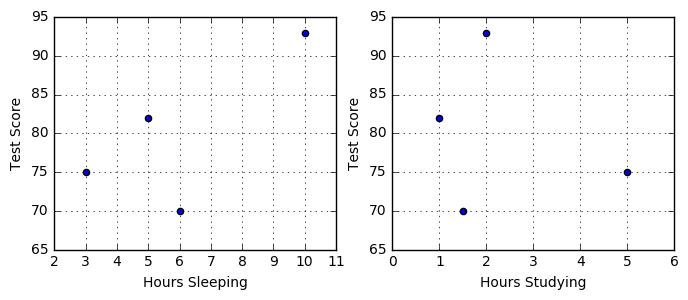

In [164]:
#Plot projections of our new data:

import matplotlib.pyplot as plt
fig = plt.figure(0,(8,3))

plt.subplot(1,2,1)
plt.scatter(X[:,0], y)
plt.grid(1)
plt.xlabel('Hours Sleeping')
plt.ylabel('Test Score')

plt.subplot(1,2,2)
plt.scatter(X[:,1], y)
plt.grid(1)
plt.xlabel('Hours Studying')
plt.ylabel('Test Score')
plt.show()

In [165]:
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

In [166]:
T = trainer(NN)
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 97
         Function evaluations: 106
         Gradient evaluations: 106


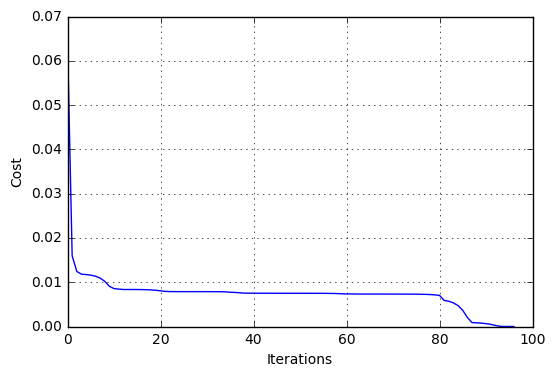

In [167]:
#Plot cost during training:
plt.plot(T.J)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [168]:
#Test network for various combinations of sleep/study:
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [169]:
allOutputs = NN.forward(allInputs)

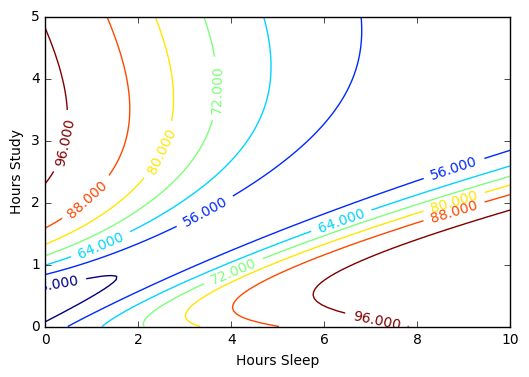

In [170]:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('Hours Sleep')
plt.ylabel('Hours Study')
plt.show()

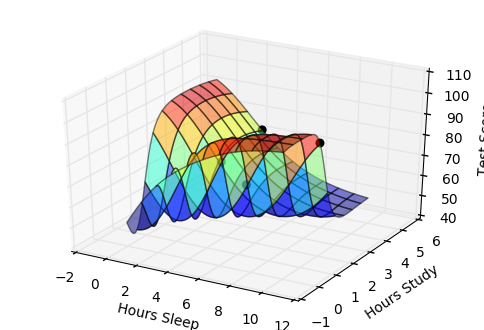

In [172]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

#Scatter training examples:
ax.scatter(10*X[:,0], 5*X[:,1], 100*y, c='k', alpha = 1, s=30)


surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet, alpha = 0.5)


ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')
fig

So it appears our model is overfitting, but how do we know for sure? A widely accepted method is to split our data into 2 portions: training and testing. We won’t touch our testing data while training the model, and only use it to see how we’re doing – our testing data is a simulation of the real world. We can plot the error on our training and testing sets as we train our model and identify the exact point at which overfitting begins. We can also plot testing and training error as a function of model complexity a see similar behavior.

In [185]:
#Training Data:
trainX = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
trainY = np.array(([75], [82], [93], [70]), dtype=float)

#Testing Data:
testX = np.array(([4, 5.5], [4.5,1], [9,2.5], [6, 2]), dtype=float)
testY = np.array(([70], [89], [85], [75]), dtype=float)

#Normalize:
trainX = trainX/np.amax(trainX, axis=0)
trainY = trainY/100 #Max test score is 100

#Normalize by max of training data:
testX = testX/np.amax(trainX, axis=0)
testY = testY/100 #Max test score is 100

In [186]:
##Need to modify trainer class a bit to check testing error during training:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [187]:
#Train network with new data:
NN = Neural_Network()

T = trainer(NN)
#Plot cost during training:
plot(T.J)
plot(T.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')T.train(trainX, trainY, testX, testY)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 89
         Function evaluations: 95
         Gradient evaluations: 95


In [205]:
plt.plot(T.J)
plt.plot(T.testJ)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

TypeError: plot() missing 1 required positional argument: 'ys'

#Plot cost during training:
plot(T.J)
plot(T.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

So now that we know overfitting is a problem, but how do we fix it? One way is to throw more data at the problem. A simple rule of thumb as presented by Yaser Abu-Mostaf is his excellent machine learning course available from Caltech, is that you should have at least 10 times as many examples as the degrees for freedom in your model. For us, since we have 9 weights that can change, we would need 90 observations, which we certainly don’t have.
Link to course: https://work.caltech.edu/telecourse.html
Another popular and effective way to mitigate overfitting is to use a technique called regularization. One way to implement regularization is to add a term to our cost function that penalizes overly complex models. A simple, but effective way to do this is to add together the square of our weights to our cost function, this way, models with larger magnitudes of weights, cost more. We’ll need to normalize the other part of our cost function to ensure that our ratio of the two error terms does not change with respect to the number of examples. We’ll introduce a regularization hyper parameter, lambda, that will allow us to tune the relative cost – higher values of lambda will impose bigger penalties for high model complexity.

In [192]:
#Regularization Parameter:
Lambda = 0.0001 

In [193]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [208]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

If we train our model now, we see that the fit is still good, but our model is no longer interested in “exactly” fitting our data. Further, our training and testing errors are much closer, and we’ve successfully reduced overfitting on this dataset. To further reduce overfitting, we could increase lambda.

In [209]:

NN = Neural_Network(Lambda=0.0001)

In [210]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [211]:
#Should be less than 1e-8:
from numpy import linalg as LL
LL.norm(grad-numgrad)/LL.norm(grad+numgrad)

6.7360911749761693e-11

In [212]:
T = trainer(NN)

In [213]:

T.train(X,y,testX,testY)

Optimization terminated successfully.
         Current function value: 0.002618
         Iterations: 120
         Function evaluations: 124
         Gradient evaluations: 124


In [204]:
plt.plot(T.J)
plt.plot(T.testJ)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

TypeError: plot() missing 1 required positional argument: 'ys'

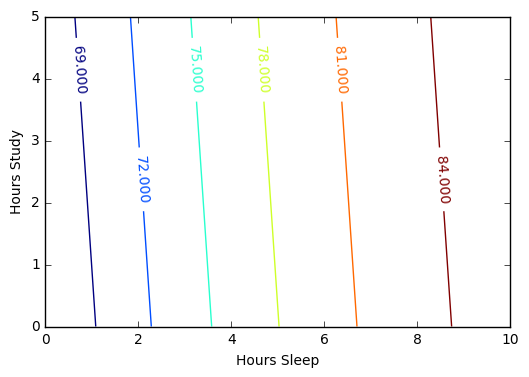

In [214]:
allOutputs = NN.forward(allInputs)

#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('Hours Sleep')
plt.ylabel('Hours Study')
plt.show()

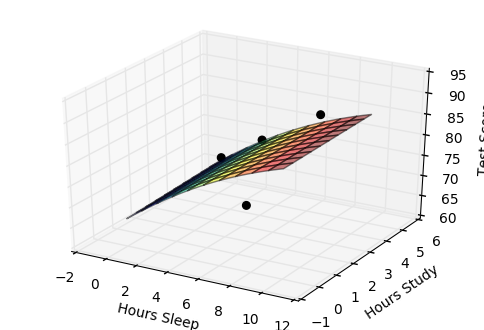

In [215]:

#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(10*X[:,0], 5*X[:,1], 100*y, c='k', alpha = 1, s=30)


surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet, alpha = 0.5)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')
fig

And that’s it, we’ve trained and evaluated an Artificial Neural Network to predict your score on a test based on how many hours you’ve slept and studied the night before.